<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [2]:
# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


agricultural_drought: 33149578.692858472
river_flood: 350145442.97791445
tropical_storm: 665303319.6341996
drought_spi: 15231170.418138642
heatwave_duration: 1543560449.1754582
coastal_flood: 31991317.391383085
drought_sma: 8372511.894556016
heatwave_frequency: 1064396032.3254855
heatwave_severity: 338145790.6548761
fire_frequency: 142334986.8700066
extreme_heat: 869137384.3637064
fire_FRP: 88345116.53740242
sand_dust: 130966996.28173187
vectorborne_malariapv: 627897569.134927
vectorborne_malariapf: 704537078.0383525
air_pollution: 2310863628.9953766


Hazard data normalization test with plots

In [3]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [4]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : agricultural_drought min: 0.1 max: 6.858817729041473
agricultural_drought: Log Transformation and Scaling - skew=1.518, kurtosis=0.716
IQR processed : agricultural_drought min: 0.1 max: 0.1


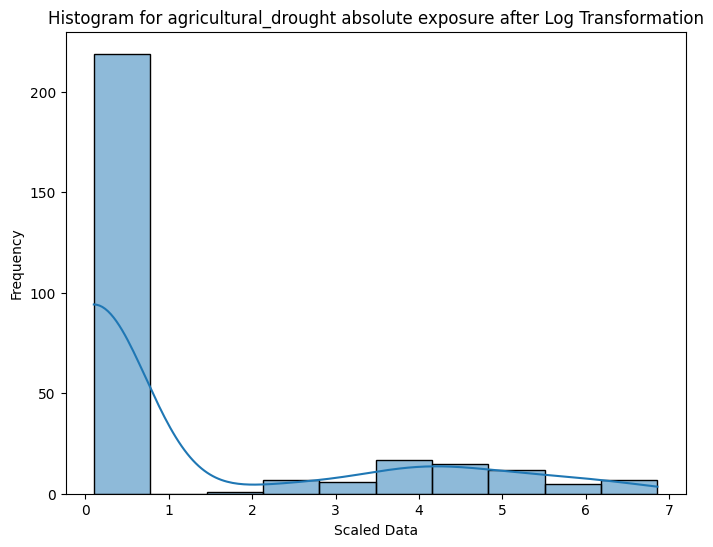

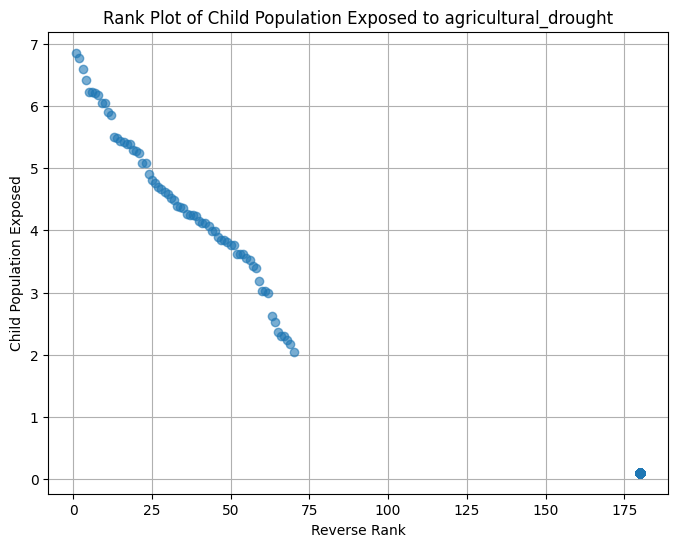

processed : river_flood min: 0.1 max: 7.874520335036511
river_flood: Log Transformation and Scaling - skew=-0.111, kurtosis=-1.692
IQR processed : river_flood min: -7.82474803259943 max: 13.307913387665717


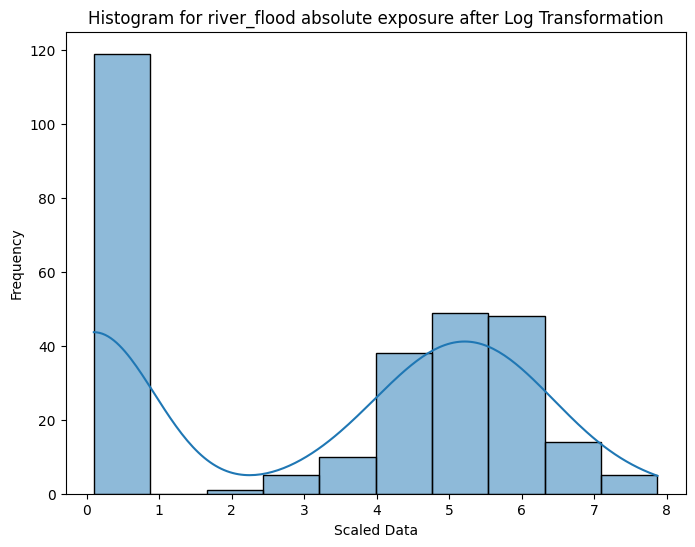

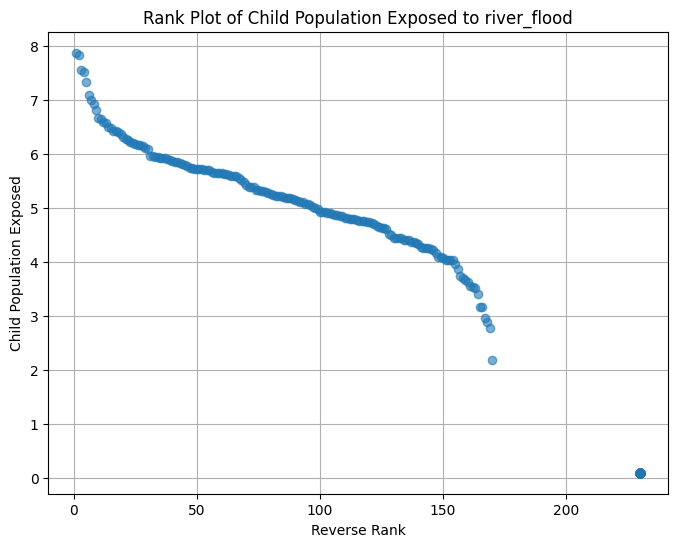

processed : tropical_storm min: 0.1 max: 8.194886653196656
tropical_storm: Log Transformation and Scaling - skew=0.714, kurtosis=-1.154
IQR processed : tropical_storm min: -6.747012705689156 max: 11.51168784281526


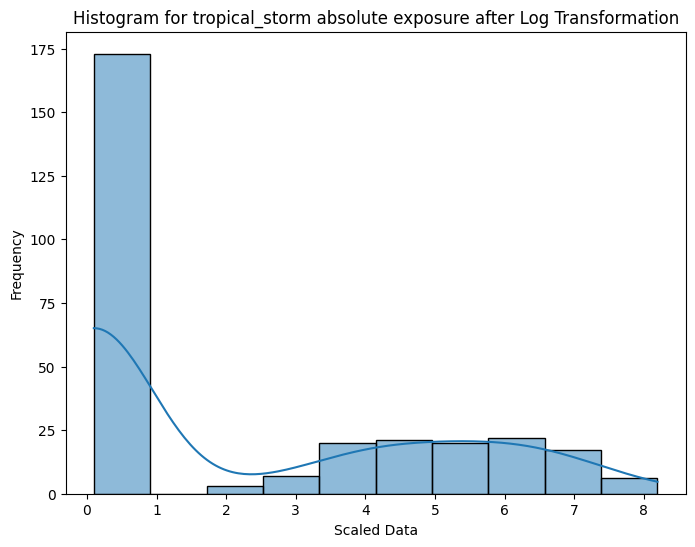

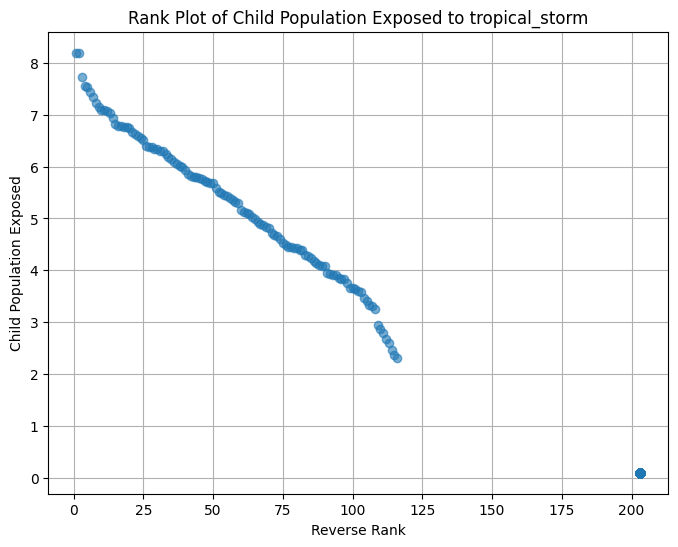

processed : drought_spi min: 0.1 max: 6.688002969881595
drought_spi: Log Transformation and Scaling - skew=1.577, kurtosis=0.899
IQR processed : drought_spi min: 0.1 max: 0.1


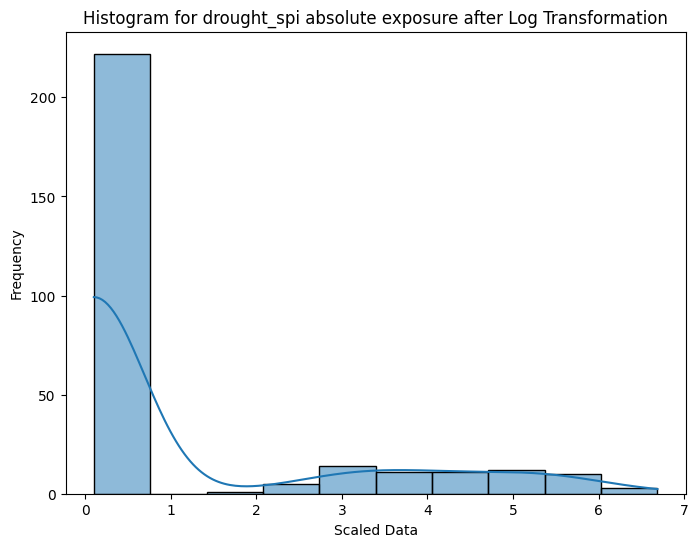

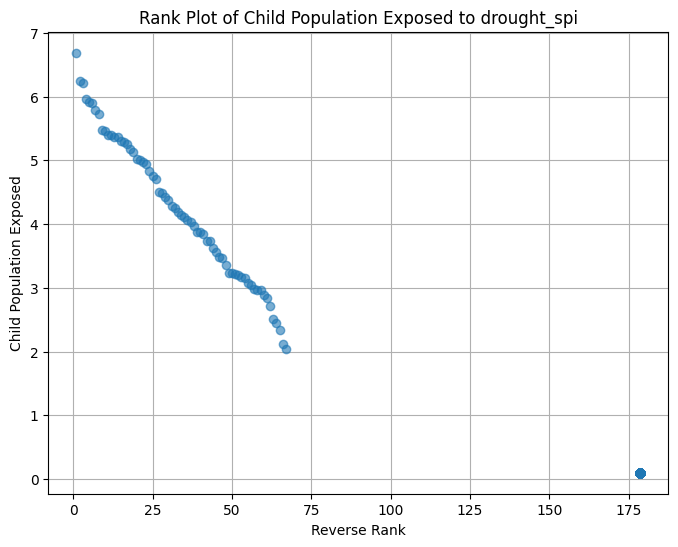

processed : heatwave_duration min: 0.1 max: 8.471391278936403
heatwave_duration: Log Transformation and Scaling - skew=-0.466, kurtosis=-1.423
IQR processed : heatwave_duration min: -9.350114247735371 max: 15.850190412892285


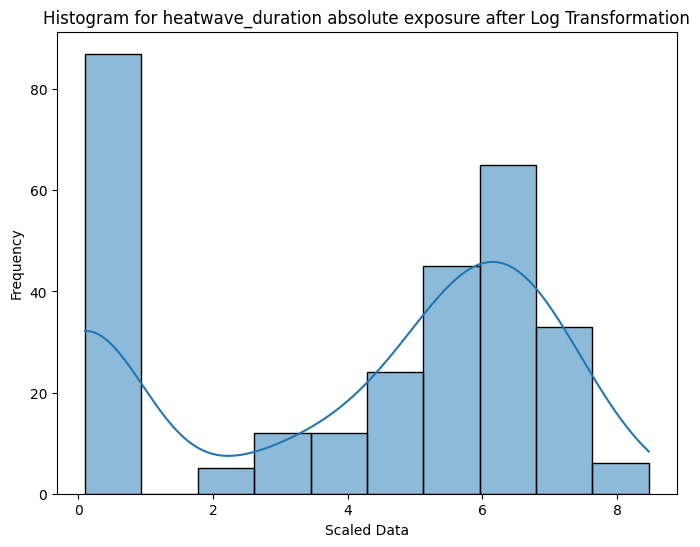

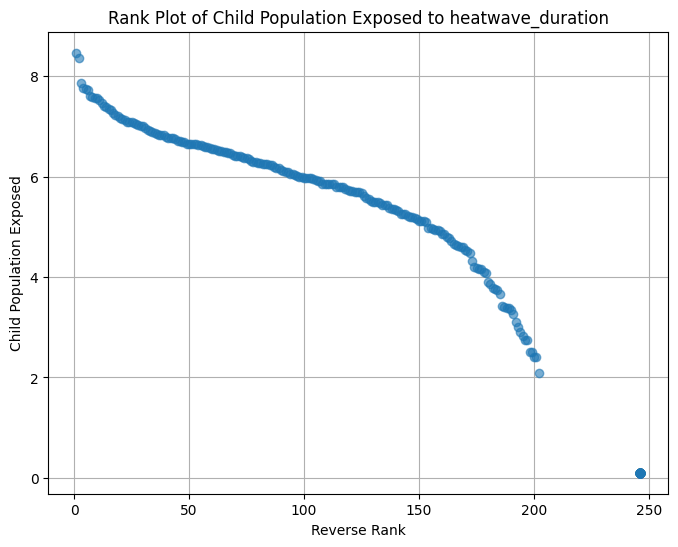

processed : coastal_flood min: 0.1 max: 7.122037104702413
coastal_flood: Log Transformation and Scaling - skew=0.445, kurtosis=-1.207
IQR processed : coastal_flood min: -5.121706792701229 max: 8.802844654502048


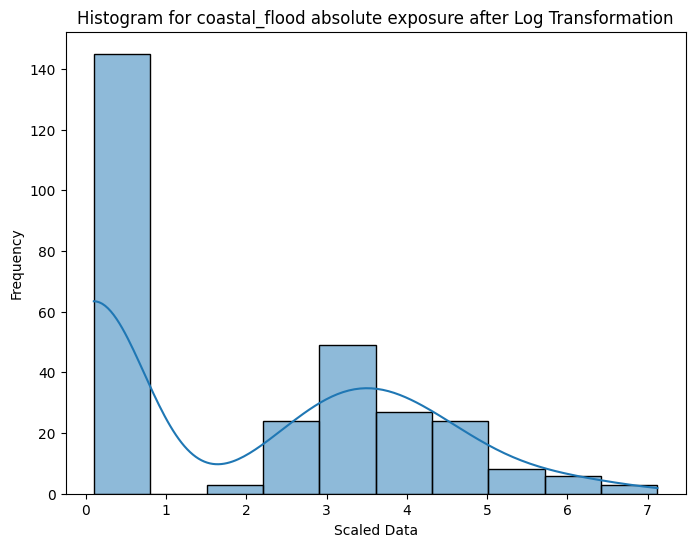

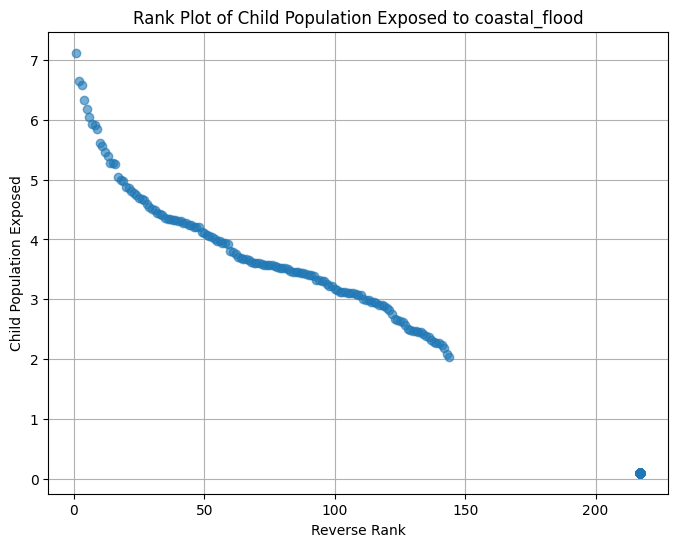

processed : drought_sma min: 0.1 max: 6.029436012572857
drought_sma: Log Transformation and Scaling - skew=1.944, kurtosis=2.047
IQR processed : drought_sma min: 0.1 max: 0.1


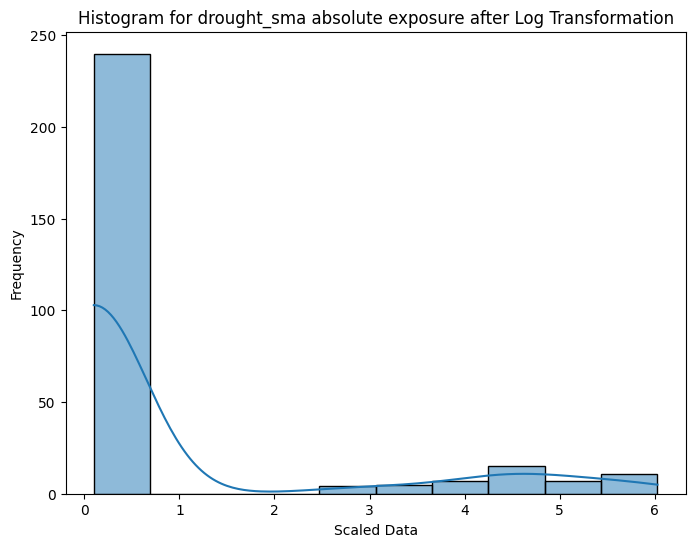

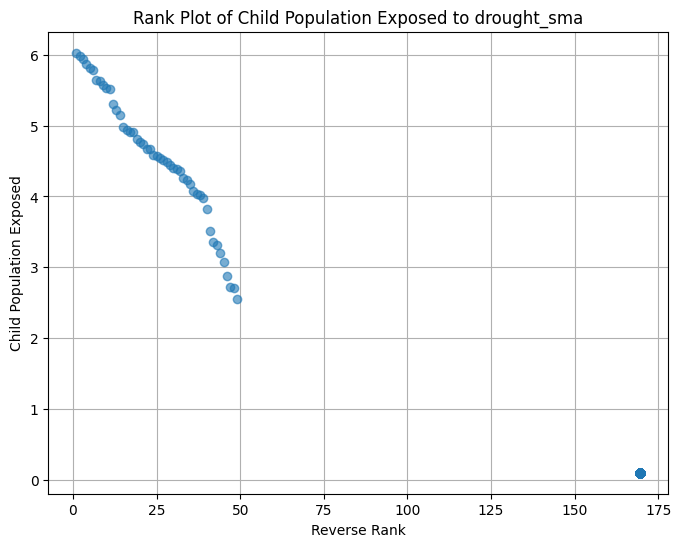

processed : heatwave_frequency min: 0.1 max: 8.307471231690446
heatwave_frequency: Log Transformation and Scaling - skew=-0.535, kurtosis=-1.350
IQR processed : heatwave_frequency min: -9.264913947141903 max: 15.708189911903169


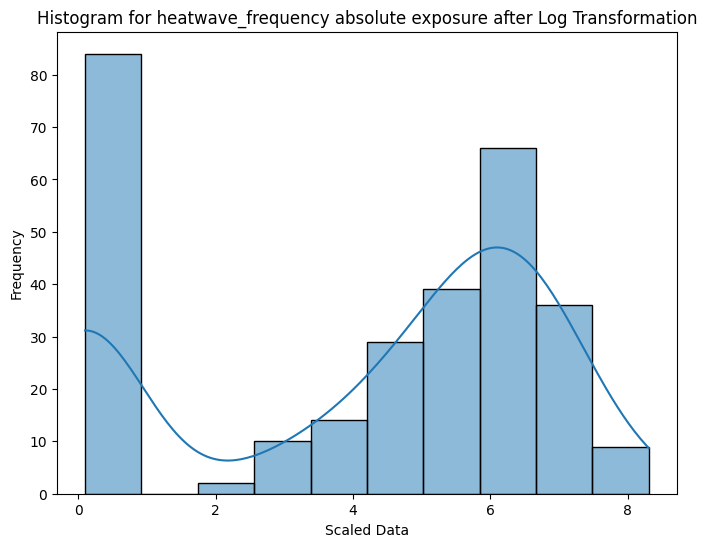

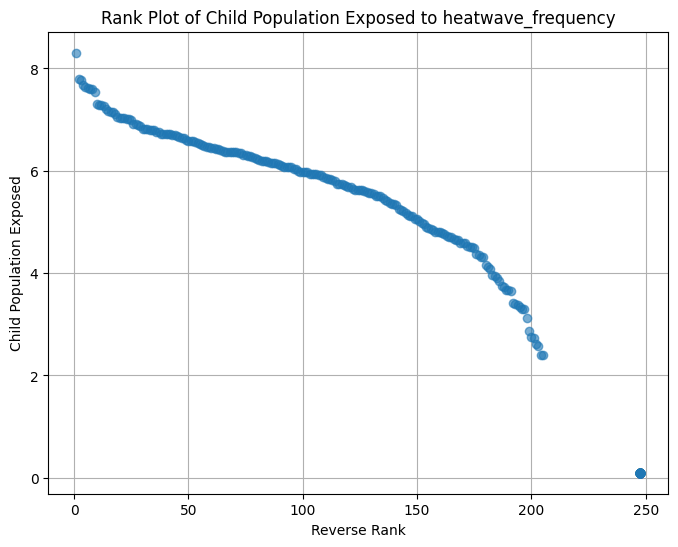

processed : heatwave_severity min: 0.1 max: 7.812985695138427
heatwave_severity: Log Transformation and Scaling - skew=0.875, kurtosis=-1.088
IQR processed : heatwave_severity min: -7.573494749868326 max: 12.889157916447209


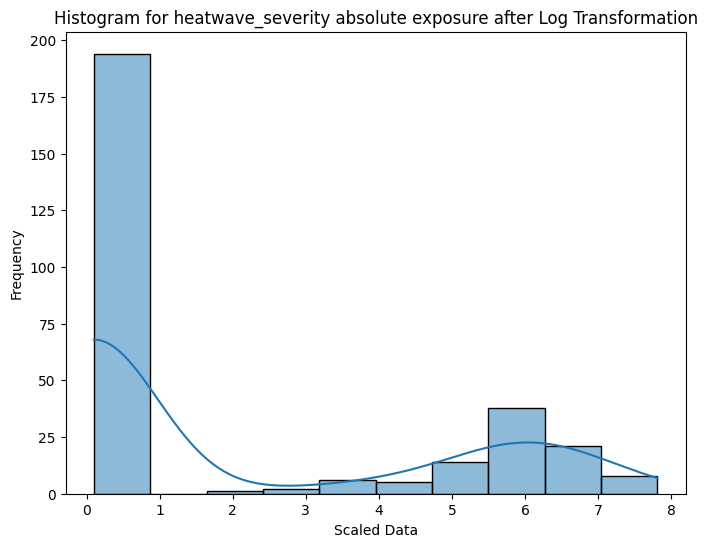

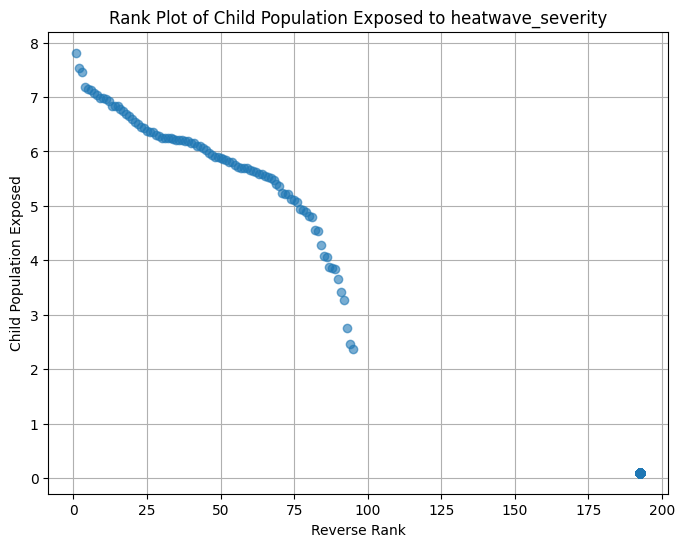

processed : fire_frequency min: 0.1 max: 7.351506831812979
fire_frequency: Log Transformation and Scaling - skew=-0.043, kurtosis=-1.609
IQR processed : fire_frequency min: -7.381857272477061 max: 12.569762120795101


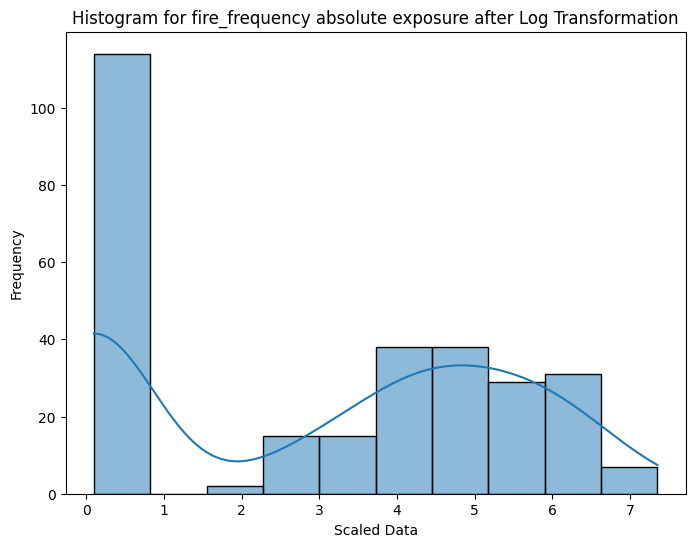

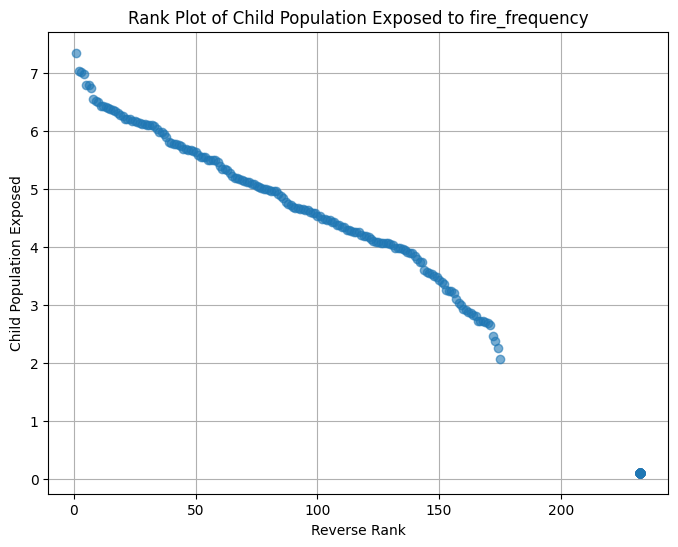

processed : extreme_heat min: 0.1 max: 8.557346332953356
extreme_heat: Log Transformation and Scaling - skew=0.710, kurtosis=-1.330
IQR processed : extreme_heat min: -7.962927930490368 max: 13.538213217483946


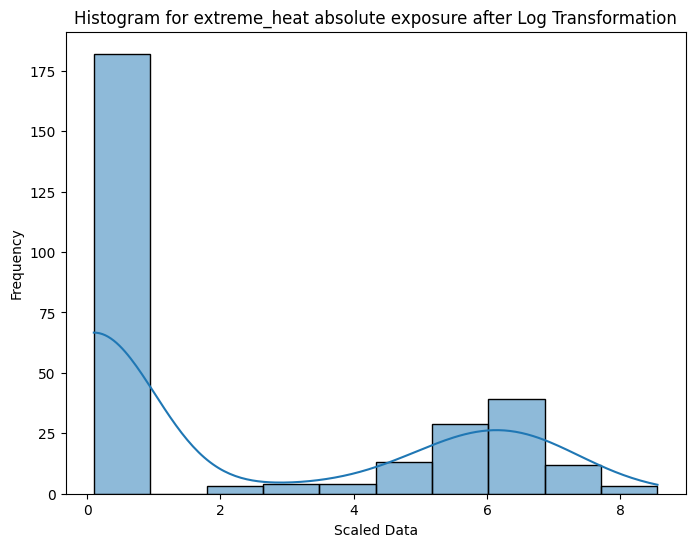

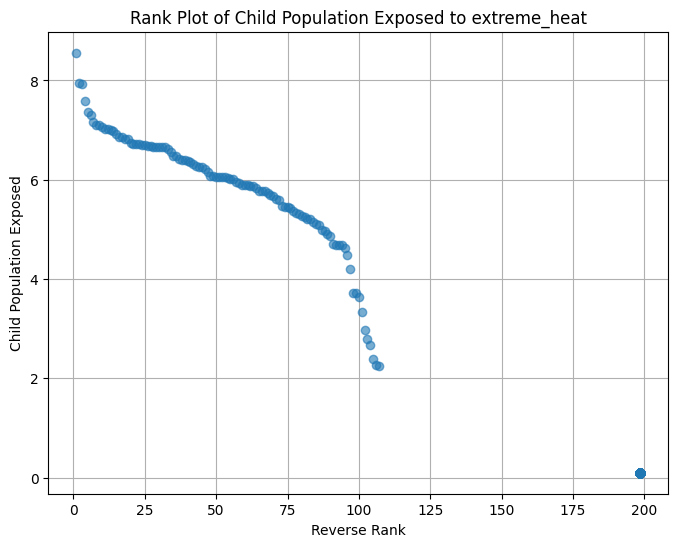

processed : fire_FRP min: 0.1 max: 6.878384119267611
fire_FRP: Log Transformation and Scaling - skew=-0.255, kurtosis=-1.633
IQR processed : fire_FRP min: -7.685337211965056 max: 13.07556201994176


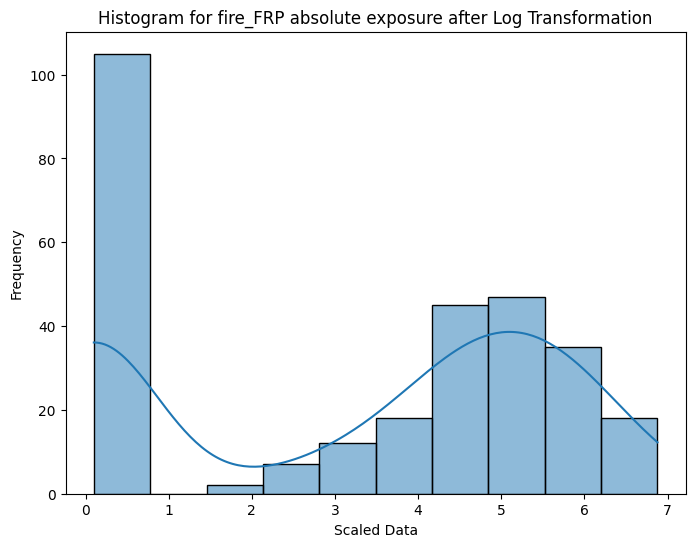

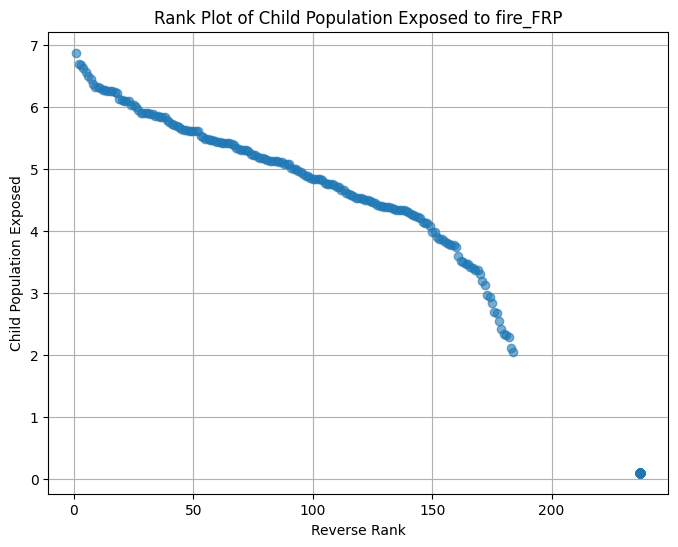

processed : sand_dust min: 0.1 max: 7.208279485164838
sand_dust: Log Transformation and Scaling - skew=0.383, kurtosis=-1.335
IQR processed : sand_dust min: -6.593752496700938 max: 11.25625416116823


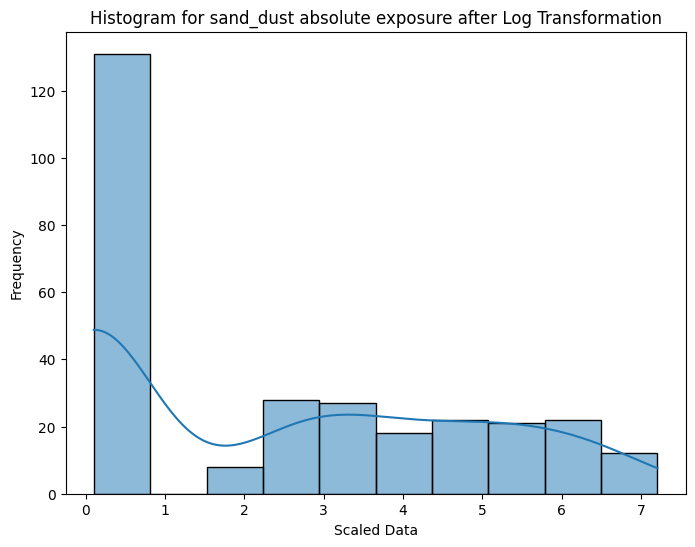

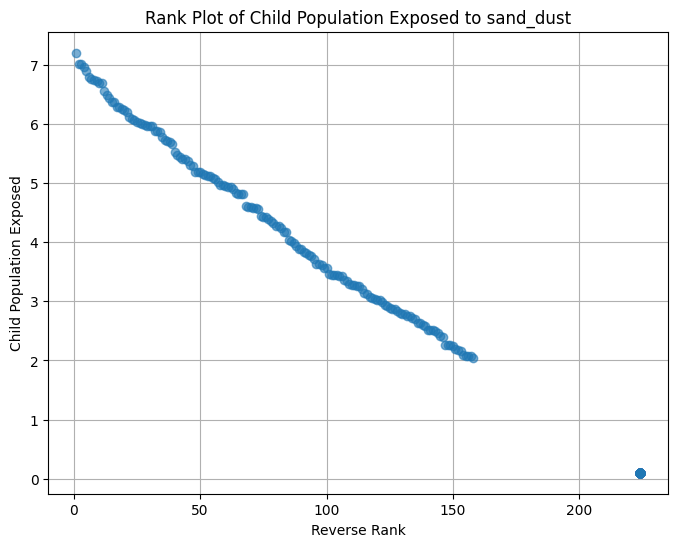

processed : vectorborne_malariapv min: 0.1 max: 8.523552272955882
vectorborne_malariapv: Log Transformation and Scaling - skew=1.795, kurtosis=1.573
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


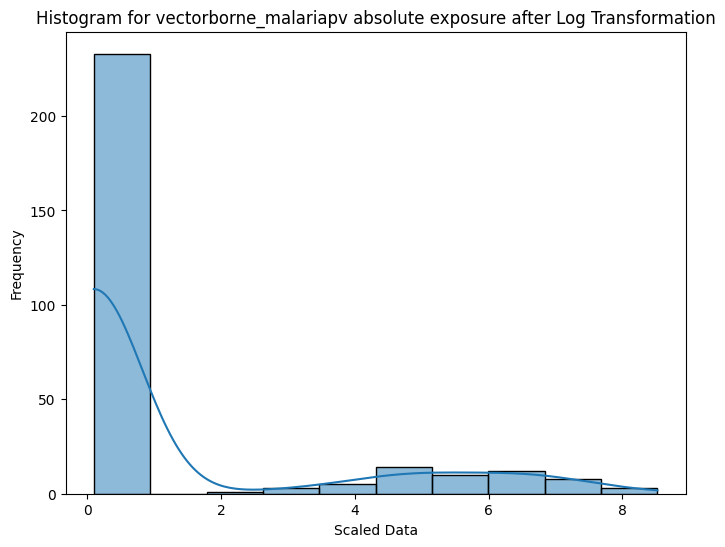

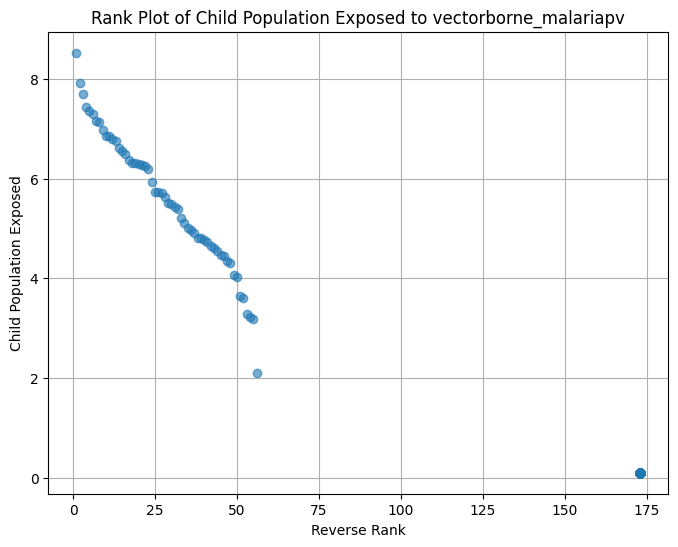

processed : vectorborne_malariapf min: 0.1 max: 8.043922938653115
vectorborne_malariapf: Log Transformation and Scaling - skew=1.033, kurtosis=-0.729
IQR processed : vectorborne_malariapf min: -6.424167880917336 max: 10.973613134862227


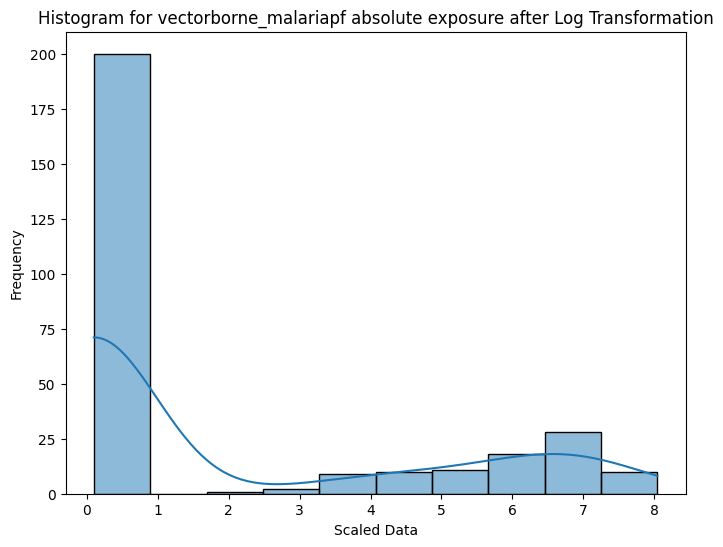

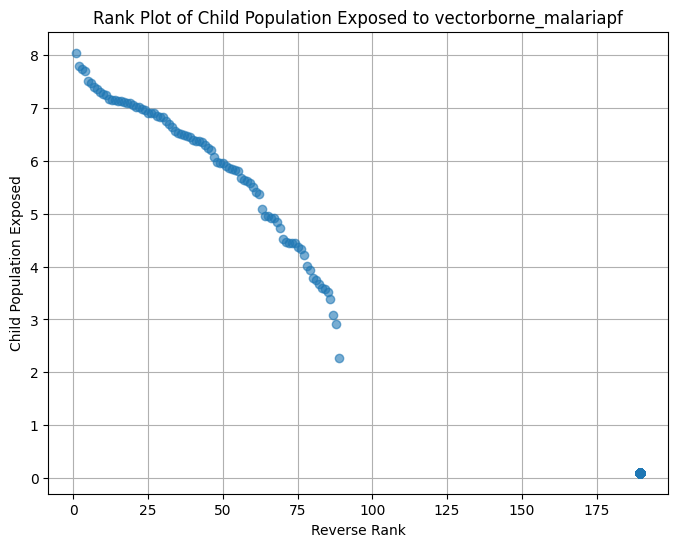

processed : air_pollution min: 0.1 max: 8.628286909043439
air_pollution: Log Transformation and Scaling - skew=-0.760, kurtosis=-0.906
IQR processed : air_pollution min: -2.4465738651265 max: 12.230087376795217


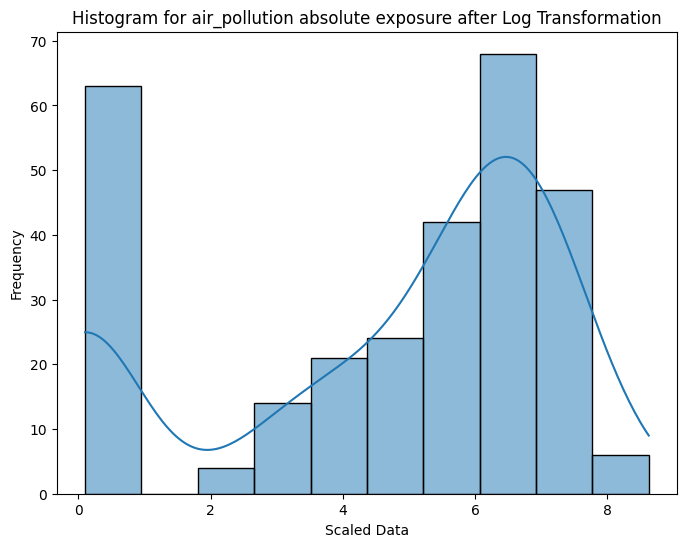

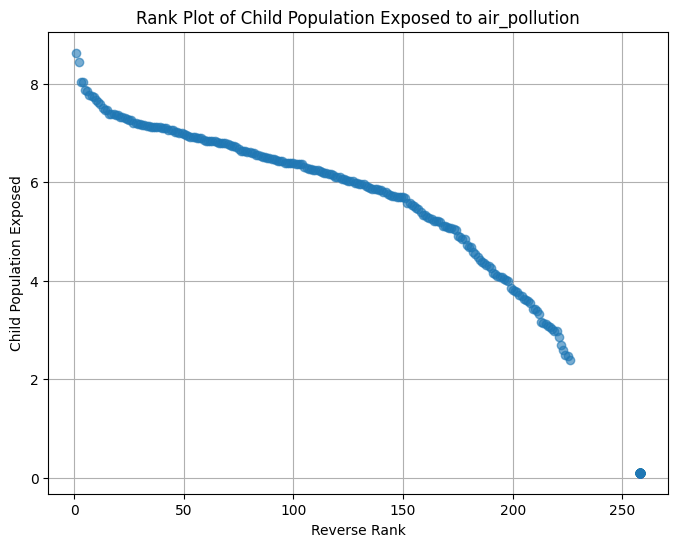

In [5]:

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
17.79523149660313
Processed: agricultural_drought | Min: 0.0009698587727858713 | Max: 3.5051025854467905
agricultural_drought: Log Transformation - skew=1.813, kurtosis=2.566
IQR processed : agricultural_drought min: -84.79817424248904 max: 141.3302904041484


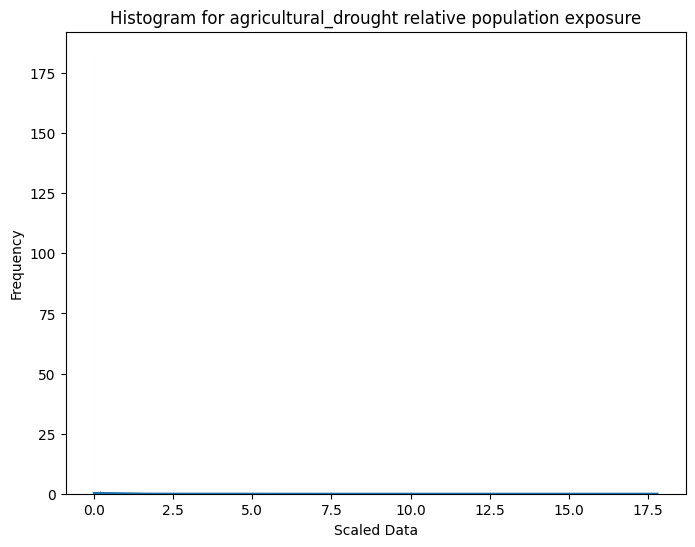

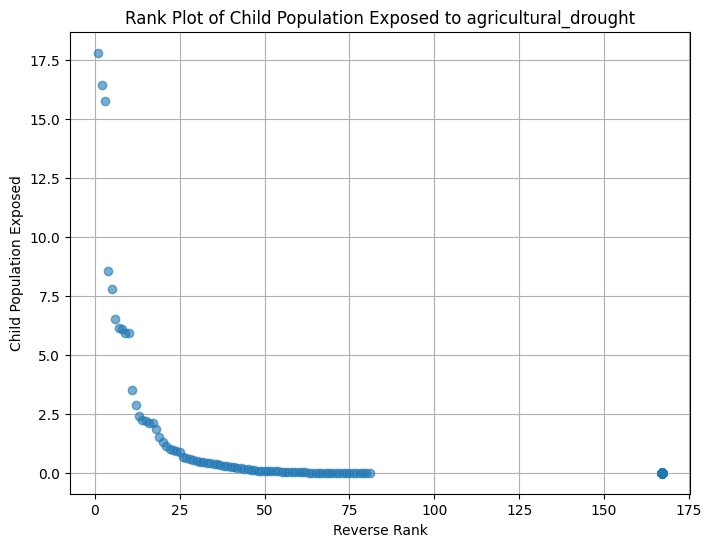

0.0
75.66605864190983
Processed: river_flood | Min: 0.3770921673435198 | Max: 33.370392489604164
river_flood: Log Transformation - skew=1.712, kurtosis=3.229
IQR processed : river_flood min: -362457.1023051606 max: 604095.170508601


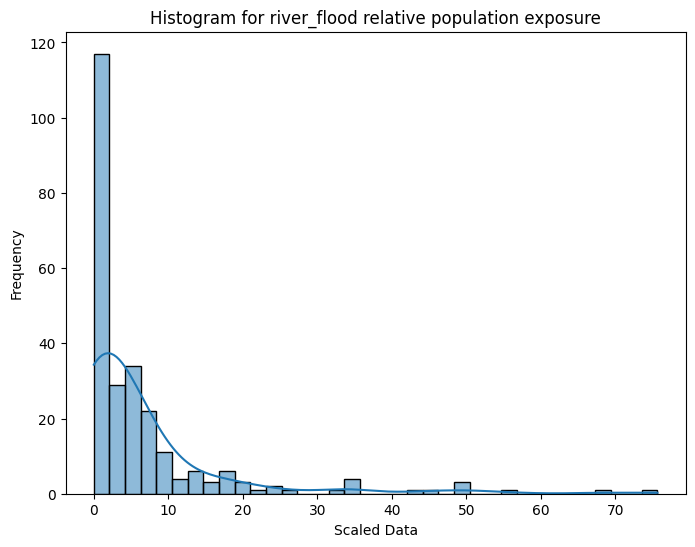

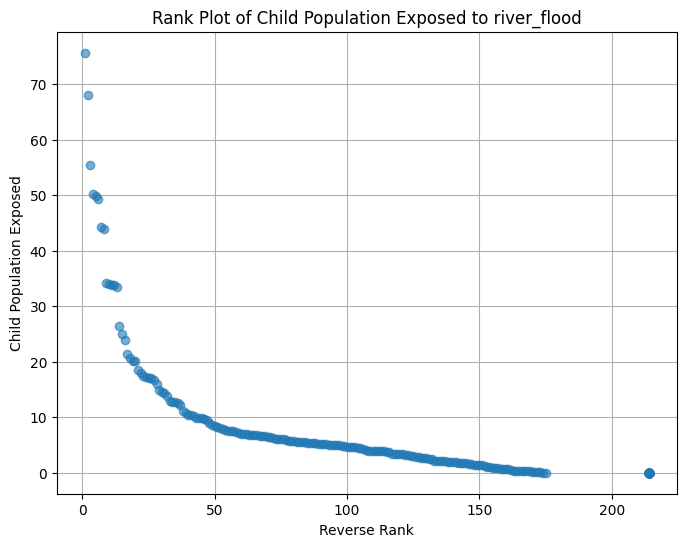

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.5796431178464565e-05 | Max: 100.0
tropical_storm: Log Transformation - skew=-1.191, kurtosis=-0.269
IQR processed : tropical_storm min: -69305.29176546268 max: 115508.81960910447


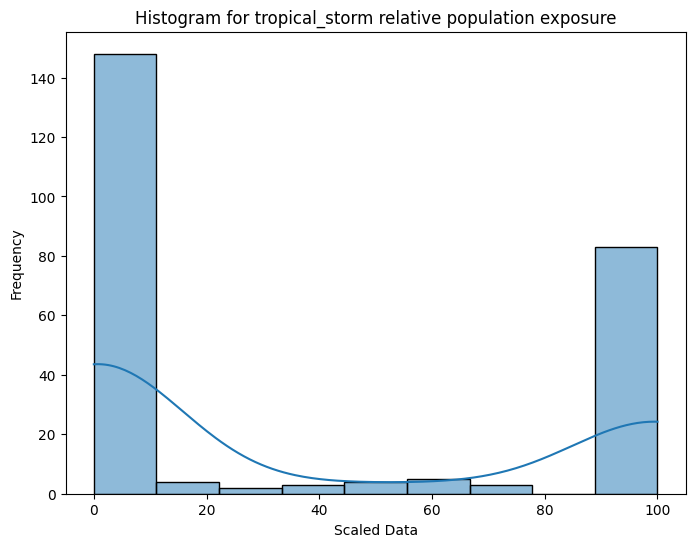

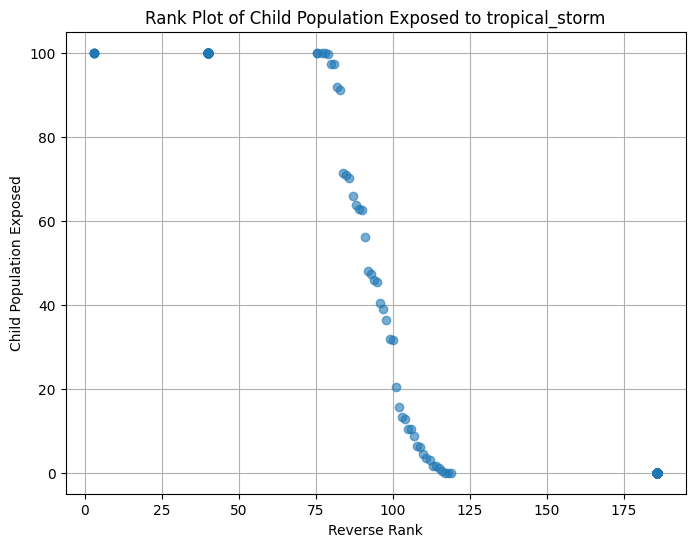

0.0
40.757954428102586
Processed: drought_spi | Min: 0.0014926206539351225 | Max: 4.198407175250855
drought_spi: Log Transformation - skew=1.985, kurtosis=2.865
IQR processed : drought_spi min: -67.78791573643684 max: 112.97985956072807


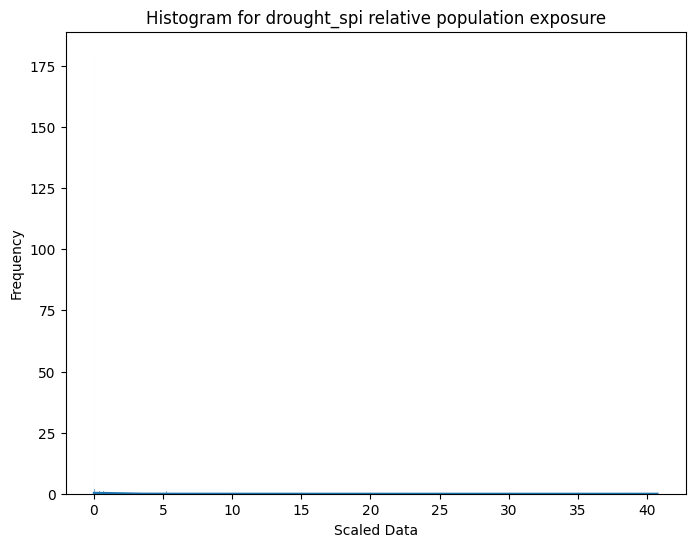

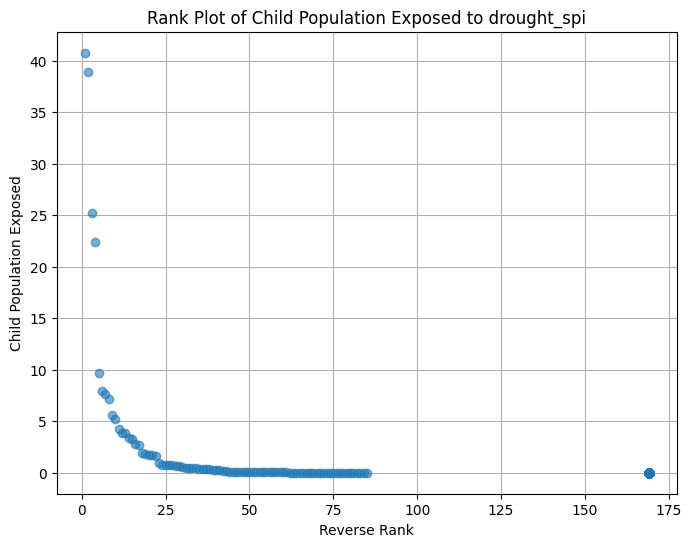

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.010867345696262395 | Max: 100.0
heatwave_duration: Log Transformation - skew=-0.125, kurtosis=-1.213
IQR processed : heatwave_duration min: -3768490.4949479434 max: 6280817.491579905


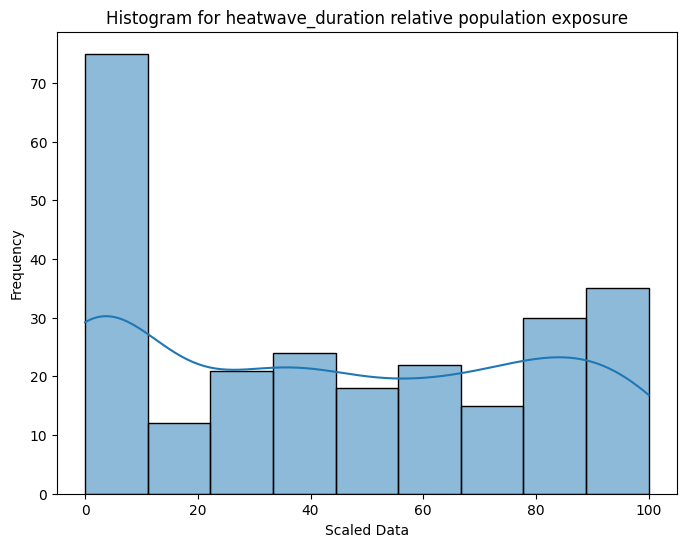

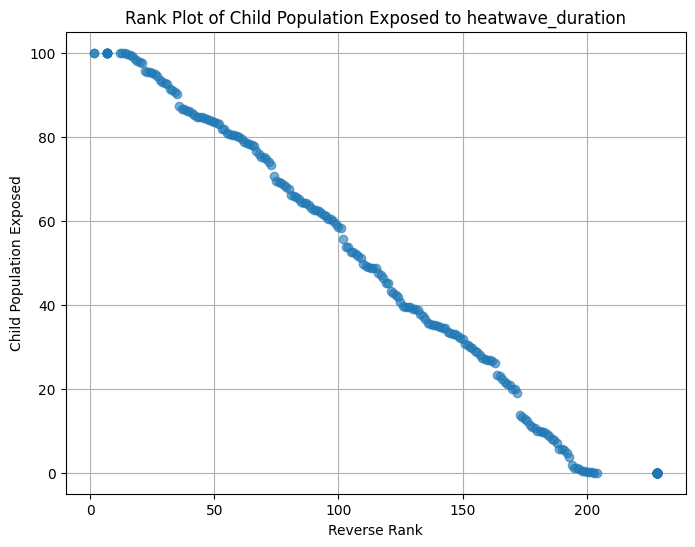

0.0
79.15911194405135
Processed: coastal_flood | Min: 0.02225776690158144 | Max: 3.468926001072453
coastal_flood: Log Transformation - skew=1.903, kurtosis=3.141
IQR processed : coastal_flood min: -5717.802113536789 max: 9529.670189227982


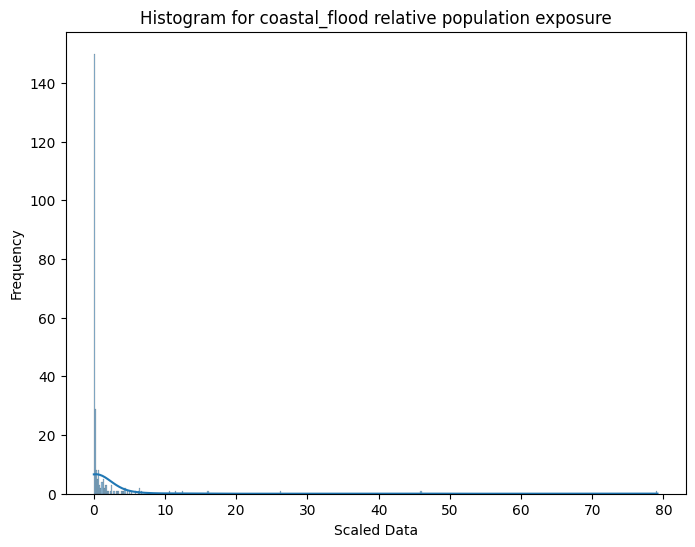

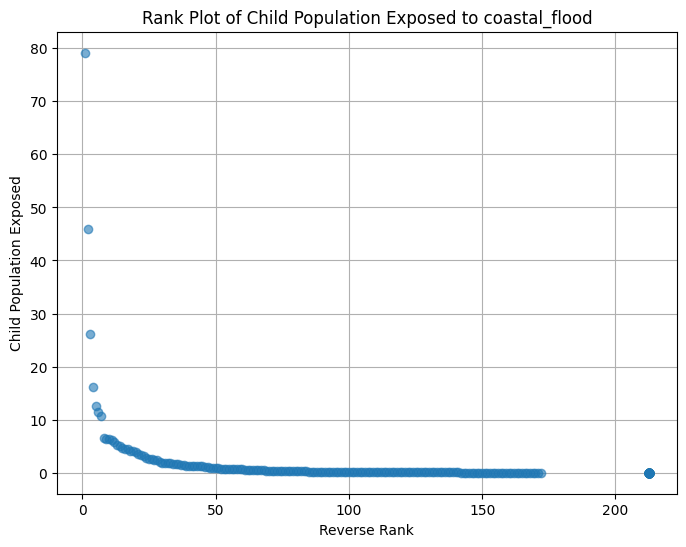

0.0
18.214128751739473
Processed: drought_sma | Min: 0.005685441475506481 | Max: 3.828271565283376
drought_sma: Log Transformation - skew=1.900, kurtosis=3.113
IQR processed : drought_sma min: 0.0 max: 0.0


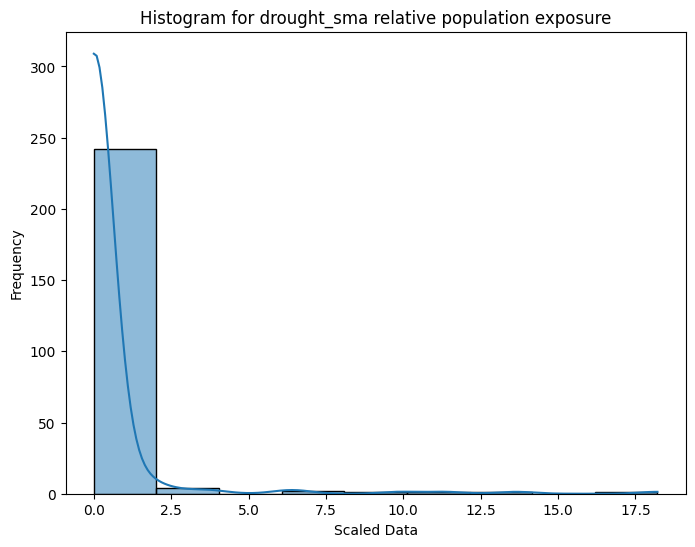

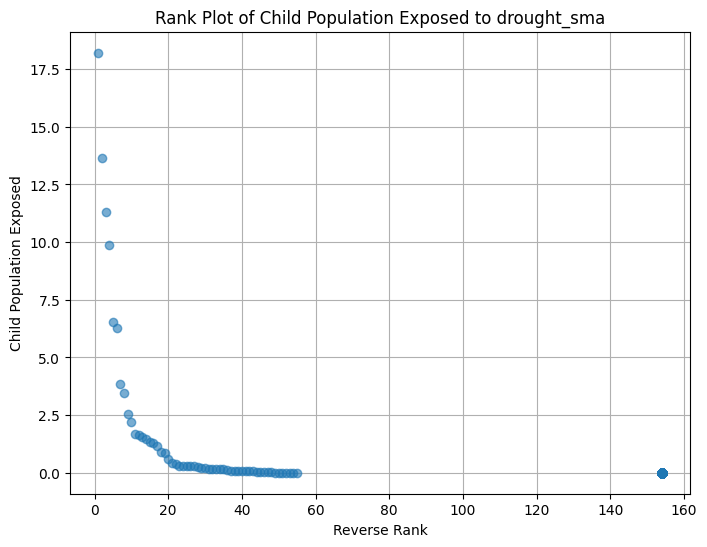

0.0
100.0
Processed: heatwave_frequency | Min: 5.9922715214051307e-05 | Max: 99.66992085238748
heatwave_frequency: Log Transformation - skew=-0.040, kurtosis=-1.385
IQR processed : heatwave_frequency min: -3306490.0779293003 max: 5510816.796548834


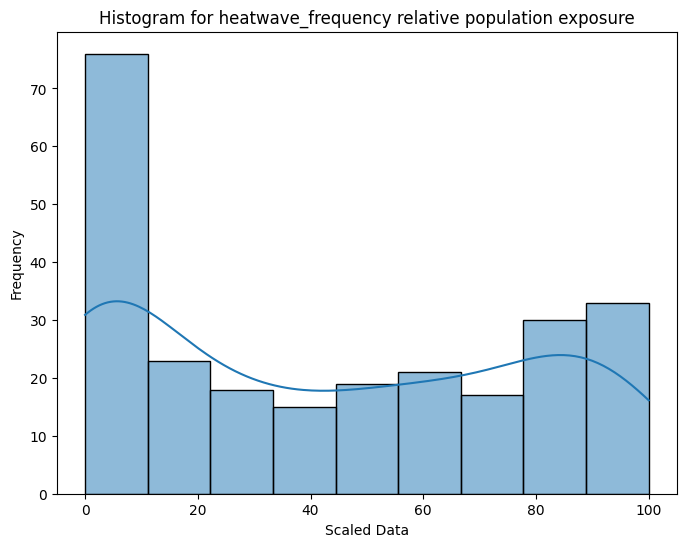

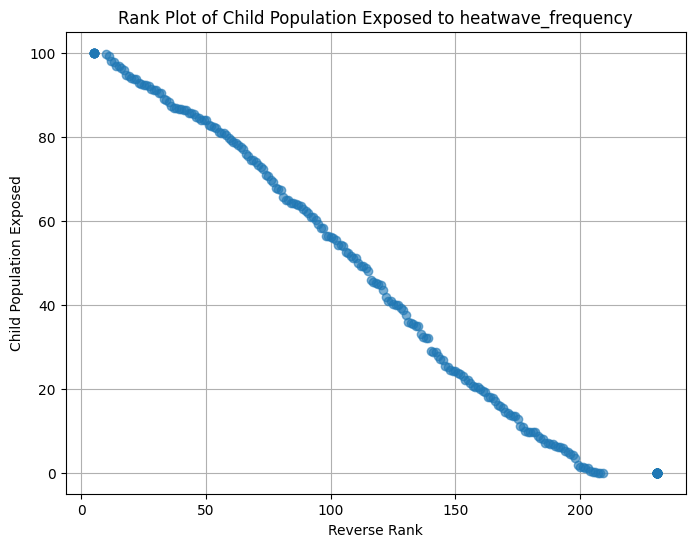

0.0
100.00000000000003
Processed: heatwave_severity | Min: 3.692205387111567e-05 | Max: 100.0
heatwave_severity: Log Transformation - skew=0.041, kurtosis=-1.660
IQR processed : heatwave_severity min: -246464.5294979703 max: 410774.2158299505


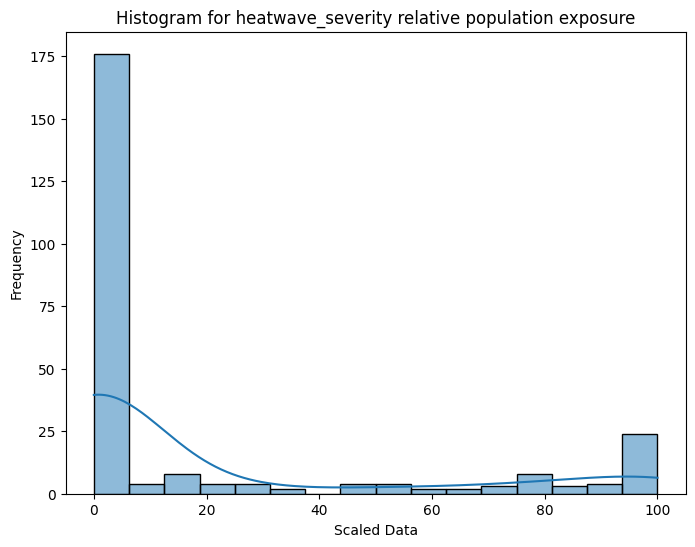

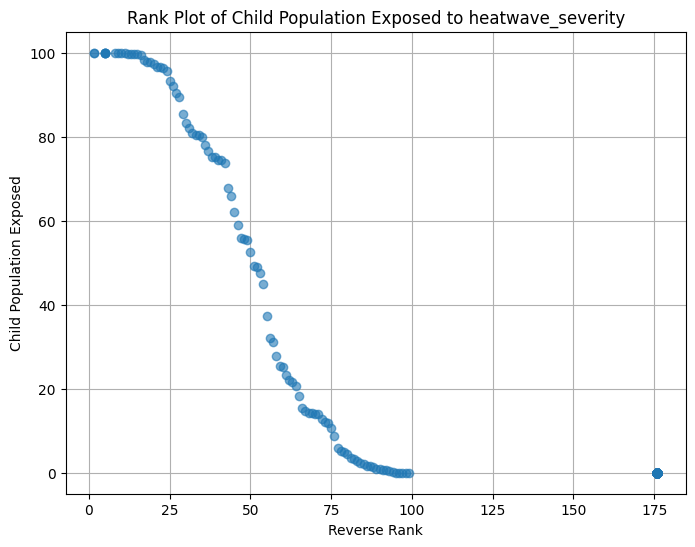

0.0
74.63166033033872
Processed: fire_frequency | Min: 0.08099011222476779 | Max: 27.642187031083925
fire_frequency: Log Transformation - skew=1.831, kurtosis=3.370
IQR processed : fire_frequency min: -183652.18823393364 max: 306086.9803898894


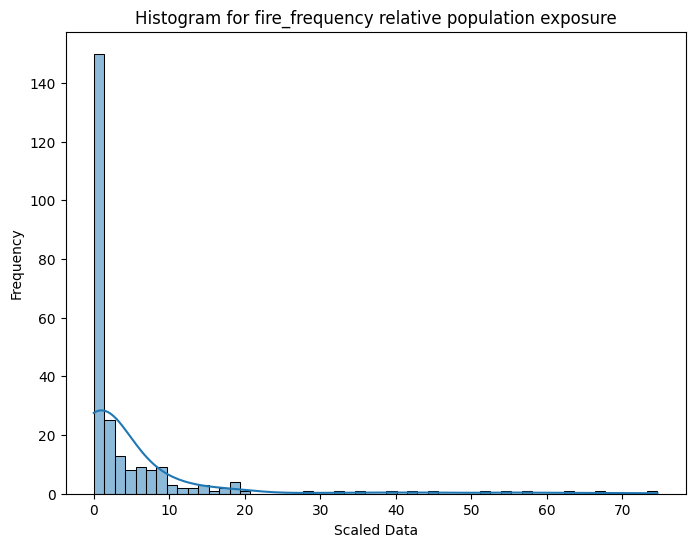

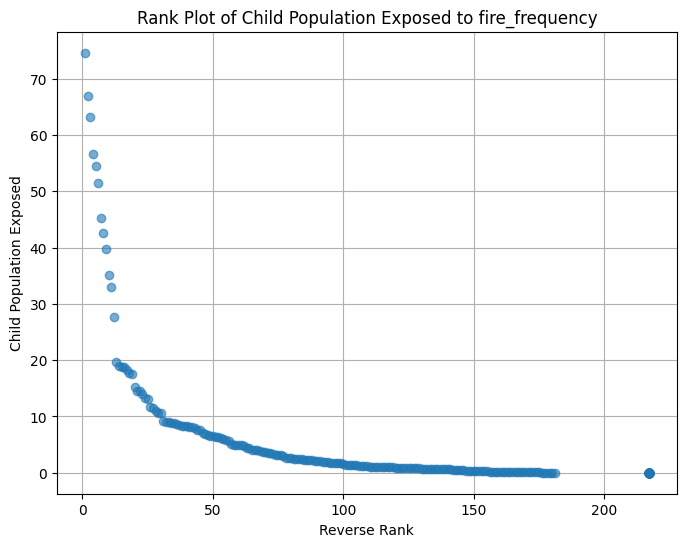

0.0
100.00000000000003
Processed: extreme_heat | Min: 0.003774062717815601 | Max: 100.0
extreme_heat: Log Transformation - skew=0.577, kurtosis=-1.157
IQR processed : extreme_heat min: -448101.6530685801 max: 746836.0884476334


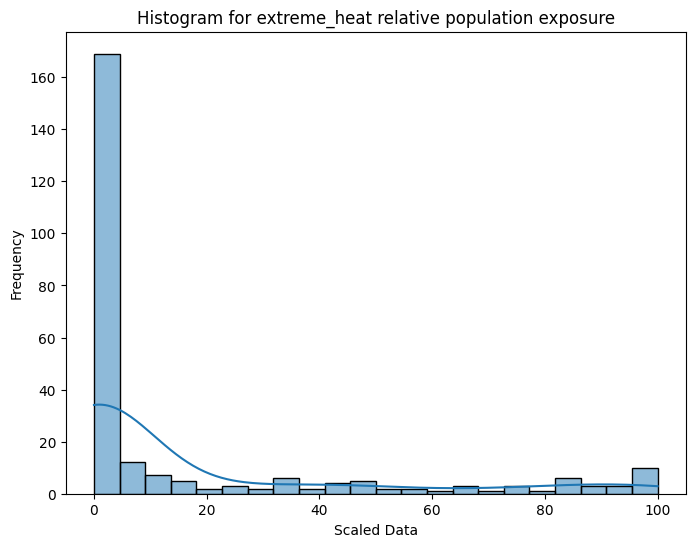

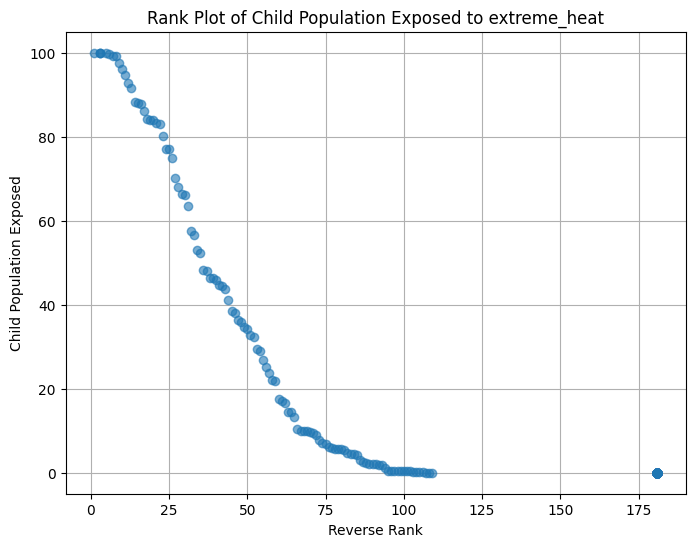

0.0
51.84454925439594
Processed: fire_FRP | Min: 0.1112134294412687 | Max: 22.407948820267737
fire_FRP: Log Transformation - skew=1.778, kurtosis=3.278
IQR processed : fire_FRP min: -292628.12664149614 max: 487713.5444024936


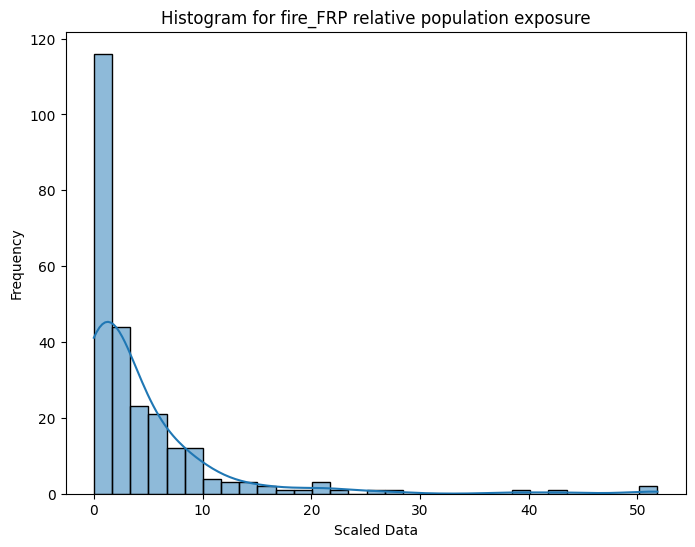

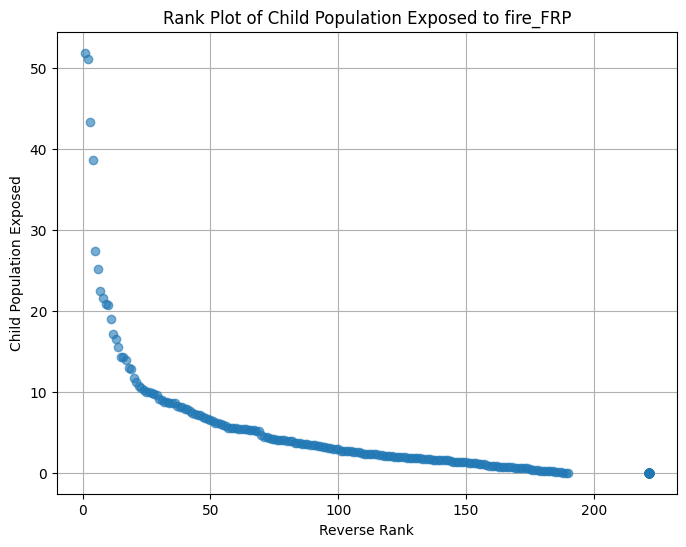

0.0
100.0
Processed: sand_dust | Min: 0.011337180998522623 | Max: 14.989477152981992
sand_dust: Log Transformation - skew=1.960, kurtosis=3.396
IQR processed : sand_dust min: -54776.32902235353 max: 91293.88170392255


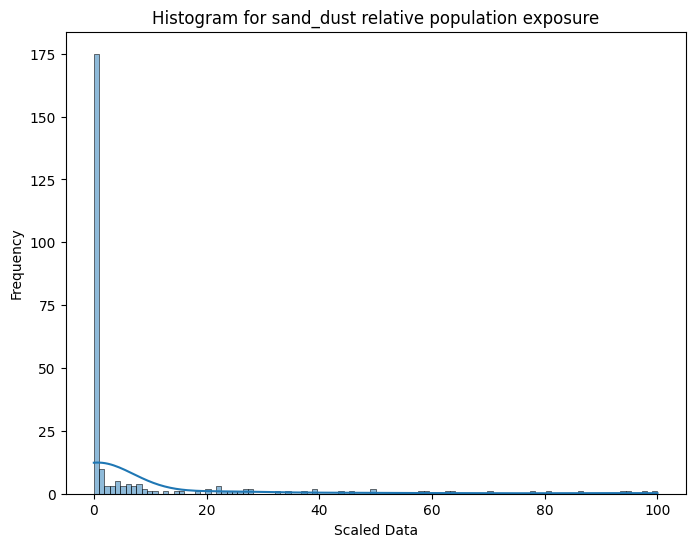

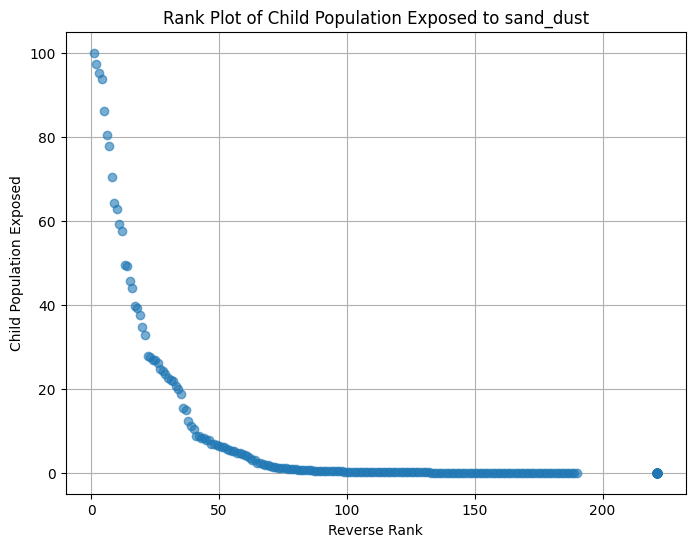

0.0
99.97254347155337
Processed: vectorborne_malariapv | Min: 0.0005498064205675533 | Max: 99.94323508626812
vectorborne_malariapv: Log Transformation - skew=0.523, kurtosis=-1.474
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


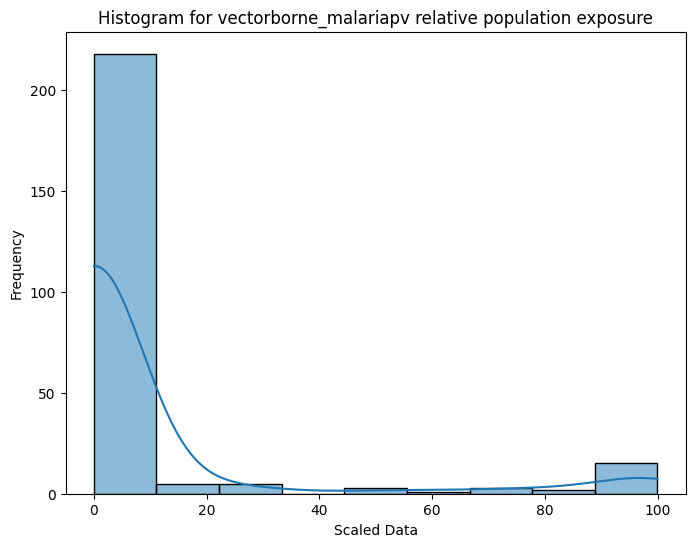

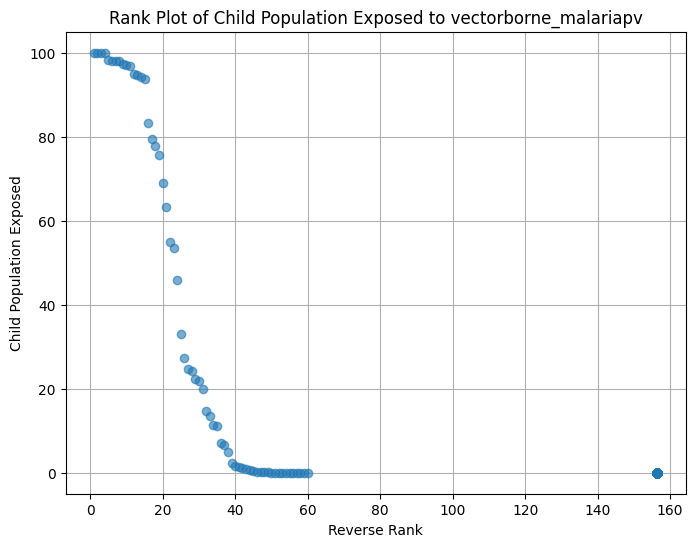

0.0
100.00000000000003
Processed: vectorborne_malariapf | Min: 0.0001269793676881396 | Max: 100.0
vectorborne_malariapf: Log Transformation - skew=-0.212, kurtosis=-1.800
IQR processed : vectorborne_malariapf min: -42221.77752189756 max: 70369.62920316259


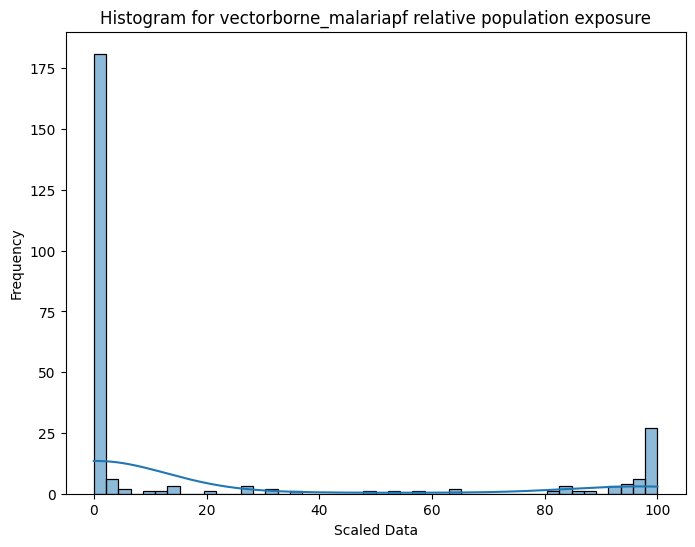

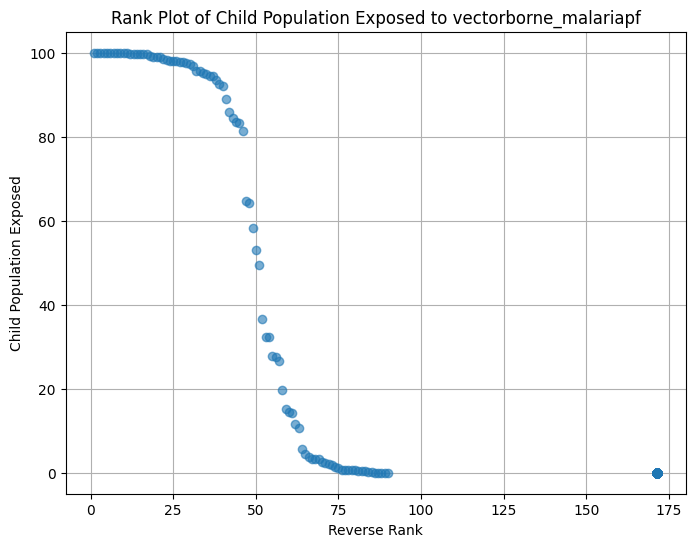

0.0
100.00000000000031
Processed: air_pollution | Min: 0.06165593591815257 | Max: 100.00000000000011
air_pollution: Log Transformation - skew=-1.954, kurtosis=3.217
IQR processed : air_pollution min: -7985012.381371274 max: 13311395.854243226


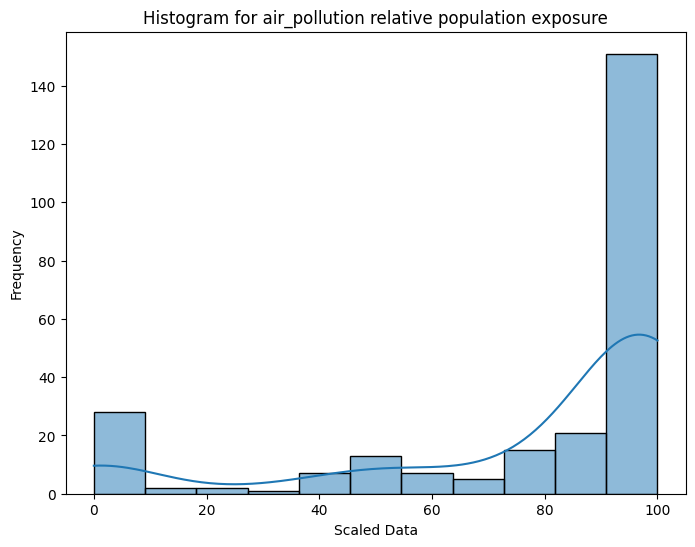

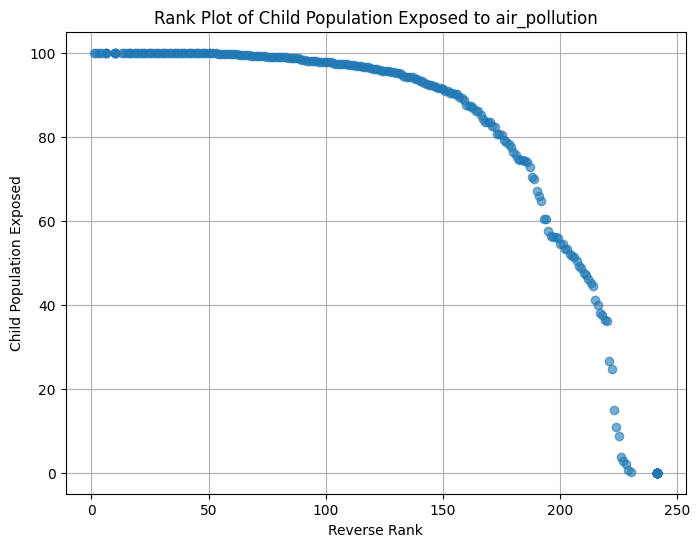

In [6]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [7]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'ISO3', 'name', 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)

    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)
    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)


    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['ISO3', 'name',
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['ISO3', 'name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv
